# HLOC NetVLAD Testing

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
# Check if we have NVidia Driver installed !
!nvidia-smi

Sun Aug  4 17:40:51 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:41:00.0 Off |                  N/A |
| 42%   60C    P2            138W /  420W |    1594MiB /  24576MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Import Stuff

In [106]:
# Imports
# Date Time
from dateutil import tz
from datetime import datetime

# Libraries
import sys
import os
import copy
import json
import numpy as np
import shutil
import PIL

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets, metrics

# PYTORCH !
import torch
import torchinfo
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# Visualization
# %matplotlib widget
%matplotlib inline

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
from torch.utils.tensorboard import SummaryWriter

# Path for Import Internal Modules
sys.path.append("/workspace/fisheye-vpr")


## Fix Seed for Reproducablity

In [107]:
# Fixxxing the Seed !
torch.manual_seed(666)

---

## Import Model

In [108]:
# Main Model
from models.vpr_model import VPRModel

# Feature Extractor
from models.encoders.hloc_vgg16 import HLOCVGG16Encoder

# Clustering
from models.clustering.hloc_netvlad import HLOCNetVLAD

# Loss
from models.loss_function.HardTripletLoss import HardTripletLoss

# Trainer
from util.train import Trainer

---

## Dataset Selection

In [109]:
# Import Dataset Class
from dataloaders.eng3_floor1_fisheye import ENG3_Floor1_Fisheye_Dataset

# Create Dataset Instance
dataset = ENG3_Floor1_Fisheye_Dataset()

---

##  Dataset Exploring

In [110]:
import util.notebook_util as notebook_util

(2, 2)


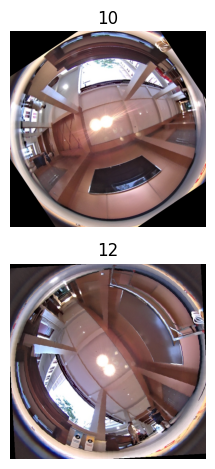

In [111]:
# Display the output
train_batch = next(iter(dataset.train_dataloader))
train_class = dataset.dataset.classes
notebook_util.visualize_batch(train_batch, train_class, header="train batch")

In [112]:
# Reload Dataset to have all the iterator reset
dataset = ENG3_Floor1_Fisheye_Dataset()

---

## Model Assembling

In [113]:
# Create the Encoder
encoder = HLOCVGG16Encoder()


[HLOC-VGG16] Loading Pretrained Model
[HLOC-VGG16] MATLAB Weights :  /workspace/fisheye-vpr/models/weights/Pitts30K_struct.mat
[HLOCVGG16] CONV2D in Layer 0 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 2 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 5 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 7 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 10 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 12 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 14 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 17 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 19 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 21 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 24 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 26 Weights and Bias Imported
[HLOCVGG16] CONV2D in Layer 28 Weights and Bias Imported
[HLOC-VGG16] Output Dim Size: 512


In [114]:
clustering = HLOCNetVLAD()

Loading MATLAB Weights based on path :  /workspace/fisheye-vpr/models/weights/Pitts30K_struct.mat
[HLOC-NetVLAD] Weights Imported
